# Isolating Bioelectrical Signal by Leak Subtraction

### *Personal Note*

*I selected this tutorial simply because I thought it was neat. From a general data science perspective it demonstates signal processing, parameter optimization, overfitting, and the importance of domain knowledge (without getting too deep in the weeds). The data was part of a more extensive projected were I explored the application of stem cell derived cardiomyocytes in arrhythmia detection. I hope you find it interesting.*

## Introduction

Electrial signals play a critical role in the normal physiology of biological cells. Consequently, it is of interest to understand and develop models of cellular electrophysiology for biotechnical and theraputic reasons. The development of electrophysiolgical models and experimental techniques to measure bioelectrical activity has an incredibly rich history. I found the field interesting because it is an area of biology that can be studied from a from a bottom-up approach.

The technical setup I used to acquire the data used here is called a voltage patch clamp (VC). During a VC experiment an electrode is placed beneath the cellular membrane to control the voltage across the membrane. A time-series of voltages are then input across the cellular membrane and the total current is recorded as output.

This particular data is my out-of-sample data that I need to clean up to evaluate the model's predictive performance.

The time-series data is defined:

***Input***: Voltage in $millivolt\text{ }(mV) $<br>
***Output***: Current density in $picoampere * picofarad^{-1}\text{ }(pA/pF)$

Let's take a look at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
c5_vc = pd.read_csv('./c5_vc_tImV.csv', delimiter=' ')
c5_vc.head()

,t_ms,i_pApF,mV
0,0.0,-1.857508,-80.000000
1,0.1,-1.892333,-79.955966
2,0.2,-1.827658,-79.911932
3,0.3,-1.862483,-79.867898
4,0.4,-1.912233,-79.823864


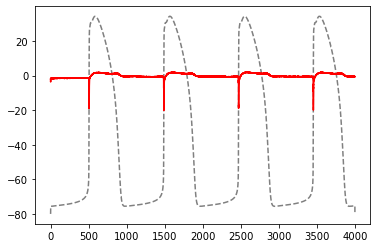

In [5]:
ax = plt.subplot()
plt.plot(c5_vc.t_ms, c5_vc.mV, color='gray', linestyle='--')
plt.plot(c5_vc.t_ms, c5_vc.i_pApF, color='red')
plt.show()

#### Notes about the data

The command-voltage (input) waveform was choosen before the experiment and mimics what a single cell would 

*Why is the output in a current density rather than $pA$?* <br>
The raw output from the experiment current is in $pA$ (or the scale set on the amplifier). Cells vary in size and larger cells can have larger current magnitude. Durning a voltage step the cellular membrane acts as a capacitor as it gets charged by the electrode. The capacitative current in proportional to the cell size and is calculated beforehand.

The temporal resolution is 0.1 ms.